Loading data from F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\HF\data\true_data_in_usd...
Data loaded and parsed successfully.
Generating plots...
Saving plot to F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\HF\visualization\asset_price_fluctuations.png...
Successfully saved plot to F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\HF\visualization\asset_price_fluctuations.png


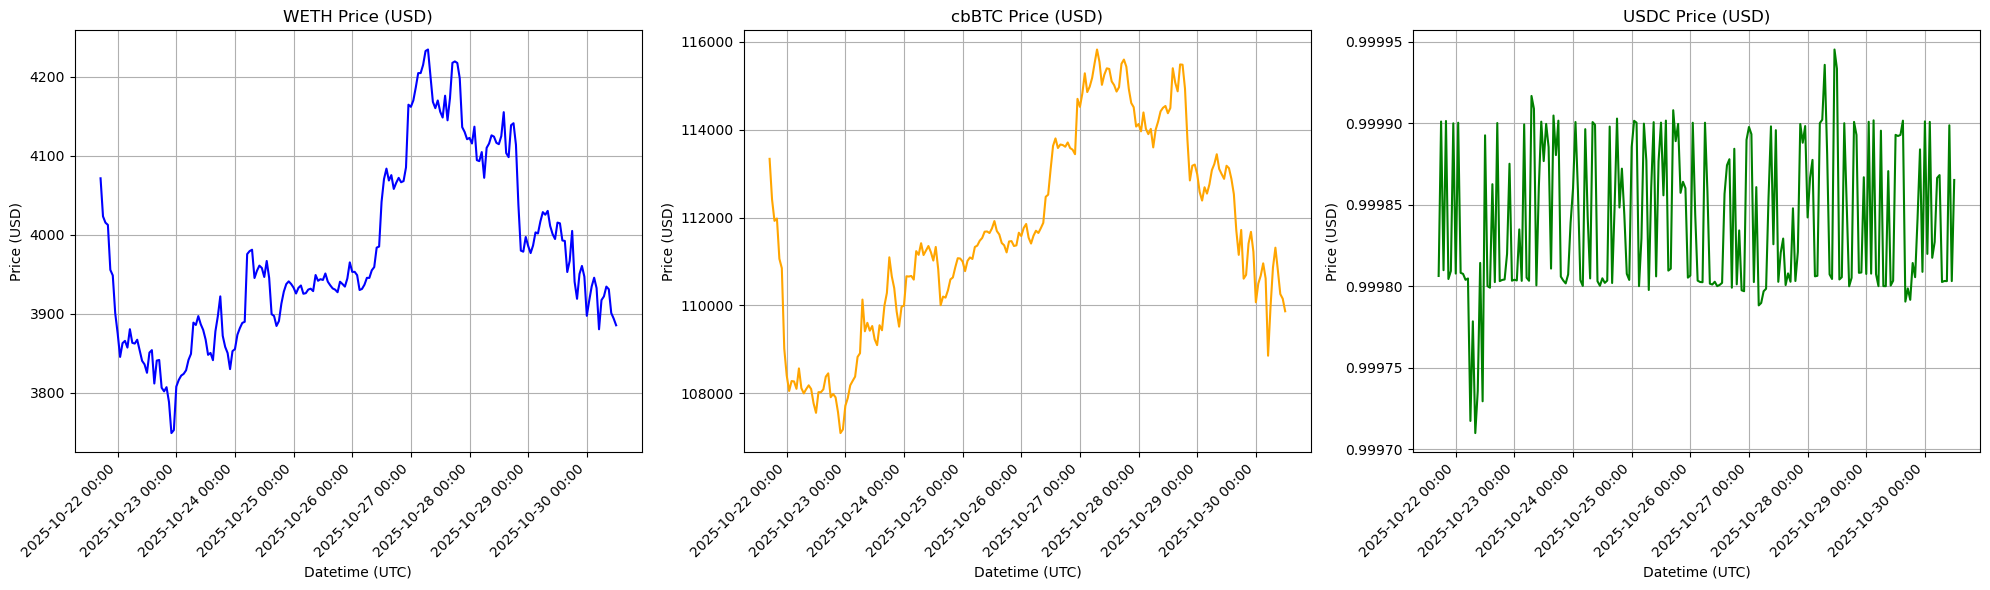

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# --- 1. Define Paths ---
BASE_PROJECT_PATH = r"F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation"

# Input directory (where the CSVs are)
DATA_DIR = os.path.join(BASE_PROJECT_PATH, "HF", "data", "true_data_in_usd")

# Output directory (where the plot will be saved)
VISUALIZATION_DIR = os.path.join(BASE_PROJECT_PATH, "HF", "visualization")

# Input file paths
weth_csv_path = os.path.join(DATA_DIR, "WETH_in_usd.csv")
cbbtc_csv_path = os.path.join(DATA_DIR, "cbBTC_in_usd.csv")
usdc_csv_path = os.path.join(DATA_DIR, "USDC_in_usd.csv")

# Output file path
output_plot_path = os.path.join(VISUALIZATION_DIR, "asset_price_fluctuations.png")

try:
    # --- 2. Read Data ---
    print(f"Loading data from {DATA_DIR}...")
    df_weth = pd.read_csv(weth_csv_path)
    df_cbbtc = pd.read_csv(cbbtc_csv_path)
    df_usdc = pd.read_csv(usdc_csv_path)

    # Convert datetime strings to datetime objects for plotting
    df_weth['datetime_utc'] = pd.to_datetime(df_weth['datetime_utc'])
    df_cbbtc['datetime_utc'] = pd.to_datetime(df_cbbtc['datetime_utc'])
    df_usdc['datetime_utc'] = pd.to_datetime(df_usdc['datetime_utc'])
    print("Data loaded and parsed successfully.")

    # --- 3. Create Plots ---
    print("Generating plots...")
    # Create a figure with 1 row and 3 columns of subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6)) # (width, height) in inches

    # --- Plot 1: WETH ---
    axes[0].plot(df_weth['datetime_utc'], df_weth['price_usd'], label='WETH', color='blue')
    axes[0].set_title('WETH Price (USD)')
    axes[0].set_xlabel('Datetime (UTC)')
    axes[0].set_ylabel('Price (USD)')
    axes[0].grid(True)

    # --- Plot 2: cbBTC ---
    axes[1].plot(df_cbbtc['datetime_utc'], df_cbbtc['price_usd'], label='cbBTC', color='orange')
    axes[1].set_title('cbBTC Price (USD)')
    axes[1].set_xlabel('Datetime (UTC)')
    axes[1].set_ylabel('Price (USD)')
    axes[1].grid(True)

    # --- Plot 3: USDC ---
    axes[2].plot(df_usdc['datetime_utc'], df_usdc['price_usd'], label='USDC', color='green')
    axes[2].set_title('USDC Price (USD)')
    axes[2].set_xlabel('Datetime (UTC)')
    axes[2].set_ylabel('Price (USD)')
    axes[2].grid(True)
    
    # Format x-axis dates for all plots to make them more readable
    for ax in axes:
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:00'))
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    # Apply compact layout
    plt.tight_layout()

    # --- 4. Save Figure ---
    # Ensure the output directory exists
    os.makedirs(VISUALIZATION_DIR, exist_ok=True)
    
    print(f"Saving plot to {output_plot_path}...")
    fig.savefig(output_plot_path, dpi=300) # Save with high resolution
    print(f"Successfully saved plot to {output_plot_path}")

except FileNotFoundError as e:
    print(f"Error: Could not find file. Make sure this file exists:\n{e.filename}")
except Exception as e:
    print(f"An error occurred: {e}")

Loading data from F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\HF\data\true_HF...
Data loaded and parsed successfully.
Generating comparison plot...
Saving plot to F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\HF\visualization\true_hf_comparison.png...
Successfully saved plot to F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\HF\visualization\true_hf_comparison.png


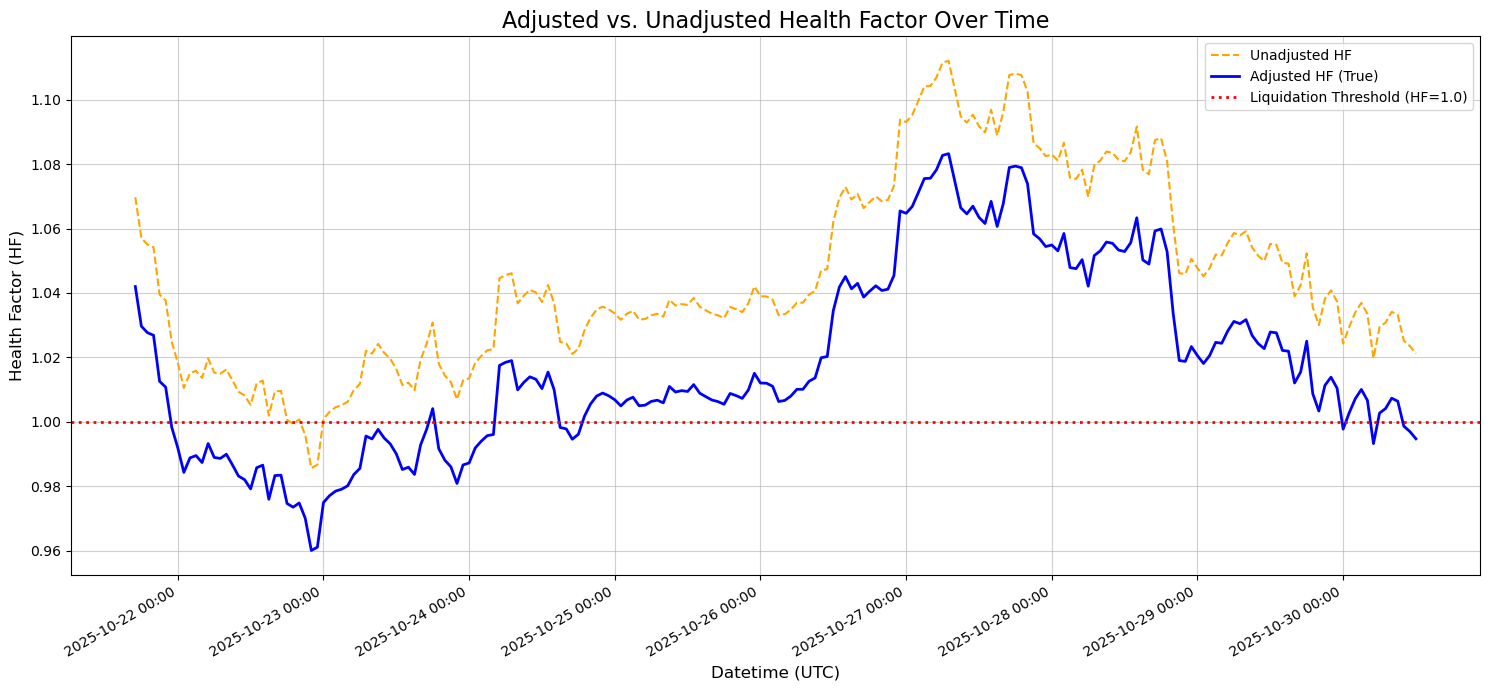

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# --- 1. Define Paths ---
BASE_PROJECT_PATH = r"F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation"

# Input directory (where the HF CSVs are)
DATA_DIR = os.path.join(BASE_PROJECT_PATH, "HF", "data", "true_HF")

# Output directory (where the plot will be saved)
VISUALIZATION_DIR = os.path.join(BASE_PROJECT_PATH, "HF", "visualization")

# Input file paths
unadjusted_csv_path = os.path.join(DATA_DIR, "true_hf_unadjusted.csv")
adjusted_csv_path = os.path.join(DATA_DIR, "true_hf_adjusted.csv")

# Output file path
output_plot_path = os.path.join(VISUALIZATION_DIR, "true_hf_comparison.png")

try:
    # --- 2. Read Data ---
    print(f"Loading data from {DATA_DIR}...")
    df_unadjusted = pd.read_csv(unadjusted_csv_path)
    df_adjusted = pd.read_csv(adjusted_csv_path)

    # Convert datetime strings to datetime objects for plotting
    df_unadjusted['datetime_utc'] = pd.to_datetime(df_unadjusted['datetime_utc'])
    df_adjusted['datetime_utc'] = pd.to_datetime(df_adjusted['datetime_utc'])
    print("Data loaded and parsed successfully.")

    # --- 3. Create Plot ---
    print("Generating comparison plot...")
    
    # Create a single figure and axis
    fig, ax = plt.subplots(figsize=(15, 7)) # (width, height) in inches

    # Plot the unadjusted HF curve
    ax.plot(df_unadjusted['datetime_utc'], df_unadjusted['HF_unadjusted'], 
            label='Unadjusted HF', color='orange', linestyle='--')

    # Plot the adjusted HF curve
    ax.plot(df_adjusted['datetime_utc'], df_adjusted['HF_adjusted'], 
            label='Adjusted HF (True)', color='blue', linewidth=2)
            
    # Add a horizontal line at y=1.0 for the liquidation threshold
    ax.axhline(y=1.0, color='red', linestyle=':', linewidth=2, label='Liquidation Threshold (HF=1.0)')

    # --- 4. Format Plot ---
    ax.set_title('Adjusted vs. Unadjusted Health Factor Over Time', fontsize=16)
    ax.set_xlabel('Datetime (UTC)', fontsize=12)
    ax.set_ylabel('Health Factor (HF)', fontsize=12)
    
    # Add a legend
    ax.legend(fontsize=10)
    
    # Enable grid for better readability
    ax.grid(True, linestyle='-', alpha=0.6)
    
    # Format x-axis dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:00'))
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

    # Apply compact layout
    plt.tight_layout()

    # --- 5. Save Figure ---
    # Ensure the output directory exists
    os.makedirs(VISUALIZATION_DIR, exist_ok=True)
    
    print(f"Saving plot to {output_plot_path}...")
    fig.savefig(output_plot_path, dpi=300) # Save with high resolution
    print(f"Successfully saved plot to {output_plot_path}")

except FileNotFoundError as e:
    print(f"Error: Could not find file. Make sure this file exists:\n{e.filename}")
except Exception as e:
    print(f"An error occurred: {e}")

这个GAF (约 0.974) 是一个全局折扣。它告诉我们，由您的CSV价格计算出的HF值，必须整体乘以 0.974，才能使其与链上预言机计算的真实HF对齐。

# 短期和长期预测能力

Starting visualization...
Processing cbBTC...
Processing WETH...
Processing USDC...

Saving plot to F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\HF\visualization\forecast_horizon_comparison_horizontal.png...
Visualization complete.


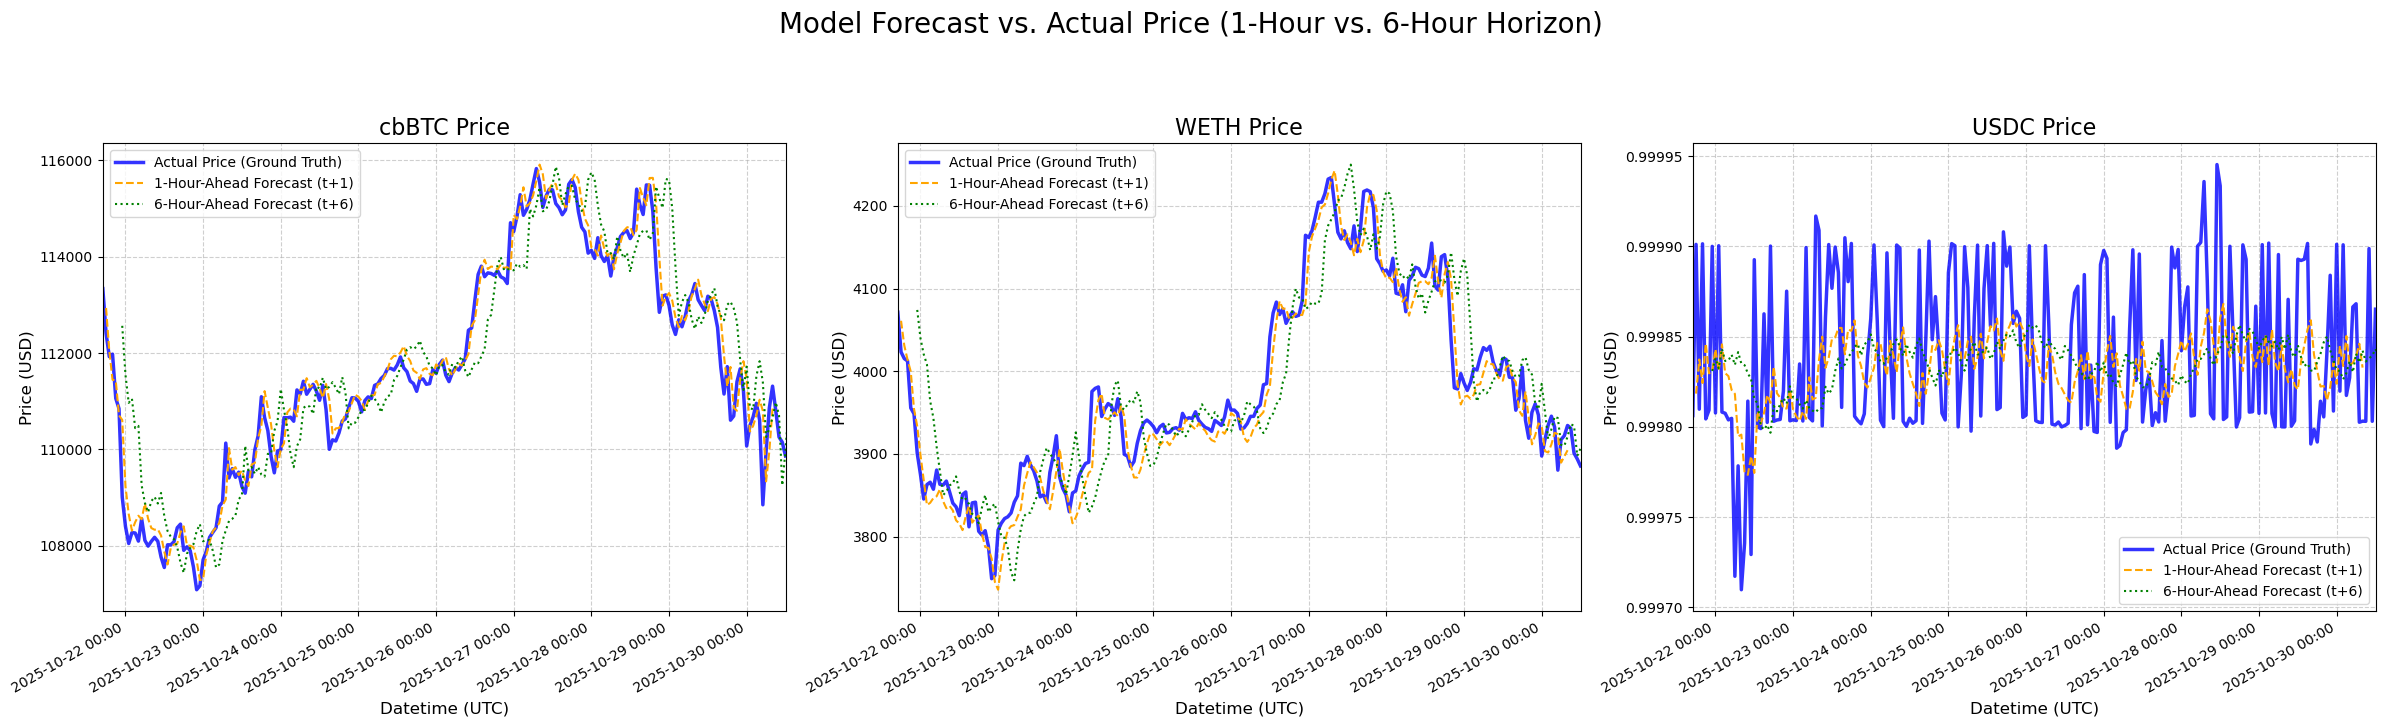

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# --- 1. 定义路径 ---
BASE_PATH = r"F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\HF"

# (!!!) 修复: 定义 LOOKAHEAD_STEPS
# 这个变量是必需的，用来确定要偏移多少时间
LOOKAHEAD_STEPS = 6

# 预测结果的输入目录
PREDICTION_DIR = os.path.join(BASE_PATH, "data", "every_timestape_prediction", "target_time_range_prediction")

# 真实价格的输入目录 (用于对比)
# 我们使用 'true_data_in_usd' 作为我们目标时间范围内的基准 "真实" 价格
ACTUAL_DIR = os.path.join(BASE_PATH, "data", "true_data_in_usd")

# 可视化输出目录
VISUALIZATION_DIR = os.path.join(BASE_PATH, "visualization")
os.makedirs(VISUALIZATION_DIR, exist_ok=True)

# 币种列表
COIN_LIST = ["cbBTC", "WETH", "USDC"]

# --- 2. 创建图表 ---
# (!!!) 修复: 修改为 1 行 3 列 (横向排列)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 7), sharey=False)
fig.suptitle('Model Forecast vs. Actual Price (1-Hour vs. 6-Hour Horizon)', fontsize=20, y=1.03)

print("Starting visualization...")

try:
    for i, coin in enumerate(COIN_LIST):
        # (!!!) 修复: 索引现在是 axes[i]
        ax = axes[i]
        print(f"Processing {coin}...")

        # --- a. 加载预测数据 ---
        pred_file = os.path.join(PREDICTION_DIR, f"{coin}_target_range_prediction.csv")
        df_pred = pd.read_csv(pred_file)
        df_pred['datetime_utc'] = pd.to_datetime(df_pred['datetime_utc'])
        # 'datetime_utc' 在这里代表 't'
        
        # --- b. 加载真实数据 ---
        actual_file = os.path.join(ACTUAL_DIR, f"{coin}_in_usd.csv")
        df_actual = pd.read_csv(actual_file)
        df_actual['datetime_utc'] = pd.to_datetime(df_actual['datetime_utc'])

        # --- c. 绘制真实价格 (Ground Truth) ---
        # 筛选真实数据以匹配预测的时间范围
        plot_range_start = df_pred['datetime_utc'].min()
        plot_range_end = df_pred['datetime_utc'].max() + pd.Timedelta(hours=LOOKAHEAD_STEPS)
        
        df_actual_filtered = df_actual[
            (df_actual['datetime_utc'] >= plot_range_start) &
            (df_actual['datetime_utc'] <= plot_range_end)
        ].set_index('datetime_utc')
        
        ax.plot(df_actual_filtered.index, df_actual_filtered['price_usd'], 
                label='Actual Price (Ground Truth)', color='blue', linewidth=2.5, alpha=0.8)

        # --- d. 绘制 1-Hour-Ahead 预测 (t+1) ---
        # 预测在't'时刻做出，针对't+1'
        df_t1 = df_pred[['datetime_utc', 'predicted_price_t_plus_1']].copy()
        df_t1['plot_time'] = df_t1['datetime_utc'] + pd.Timedelta(hours=1)
        df_t1 = df_t1.set_index('plot_time')
        
        ax.plot(df_t1.index, df_t1['predicted_price_t_plus_1'], 
                label='1-Hour-Ahead Forecast (t+1)', color='orange', linestyle='--', linewidth=1.5)

        # --- e. 绘制 6-Hour-Ahead 预测 (t+6) ---
        # 预测在't'时刻做出，针对't+6'
        df_t6 = df_pred[['datetime_utc', 'predicted_price_t_plus_6']].copy()
        df_t6['plot_time'] = df_t6['datetime_utc'] + pd.Timedelta(hours=6)
        df_t6 = df_t6.set_index('plot_time')
        
        ax.plot(df_t6.index, df_t6['predicted_price_t_plus_6'], 
                label='6-Hour-Ahead Forecast (t+6)', color='green', linestyle=':', linewidth=1.5)

        # --- f. 格式化图表 ---
        ax.set_title(f'{coin} Price', fontsize=16)
        ax.set_ylabel('Price (USD)', fontsize=12)
        ax.legend(loc='best')
        ax.grid(True, linestyle='--', alpha=0.6)
        
        # (!!!) 修复: 格式化 X 轴 (每个子图都应用)
        ax.set_xlabel('Datetime (UTC)', fontsize=12)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
        plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
        
        # 限制 x 轴范围为我们的目标区域
        ax.set_xlim(df_actual_filtered.index.min(), df_actual_filtered.index.max())

    # --- 3. 保存图像 ---
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # 调整布局以适应总标题
    
    output_plot_path = os.path.join(VISUALIZATION_DIR, "forecast_horizon_comparison_horizontal.png")
    print(f"\nSaving plot to {output_plot_path}...")
    plt.savefig(output_plot_path, dpi=300, bbox_inches='tight')
    print("Visualization complete.")

except FileNotFoundError as e:
    print(f"\n[Error] Could not find file. Make sure your prediction scripts ran successfully.")
    print(f"File not found: {e.filename}")
except NameError as e:
    print(f"\n[Error] A variable was not defined: {e}")
except Exception as e:
    print(f"\nAn error occurred: {e}")

这是一个非常好的问题，也是这个可视化设计的核心。

您看到的是**在那个时间点的真实值进行的对比**。

换句话说，当您在图上查看X轴的**某一个时间点 `T`** 时（例如 `10月25日 16:00`）：

* **蓝色实线 (Actual Price):** 是在 `T` 时刻（`16:00`）的**真实价格**。
* **橙色虚线 (t+1 Forecast):** 是模型在 `T-1` 时刻（`15:00`）对 `T` 时刻（`16:00`）做出的**预测价格**。
* **绿色虚线 (t+6 Forecast):** 是模型在 `T-6` 时刻（`10:00`）对 `T` 时刻（`16:00`）做出的**预测价格**。

我们特意在可视化代码中通过 `df_t6['plot_time'] = df_t6['datetime_utc'] + pd.Timedelta(hours=6)` 这行代码，将预测值的时间戳**向未来平移**。

这样做的目的就是为了能让您**直观地比较**：在同一个时间点，模型的长期（6小时前）预测、短期（1小时前）预测与真实值之间的差距。

Loading data from F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\HF\data\predict_HF\predicted_hf_t1_to_t6.csv...
Data loaded. Found 207 timestamps.
Generating plot...
Saving plot to F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\HF\visualization\predicted_hf_distribution_over_time.png...
Visualization complete.


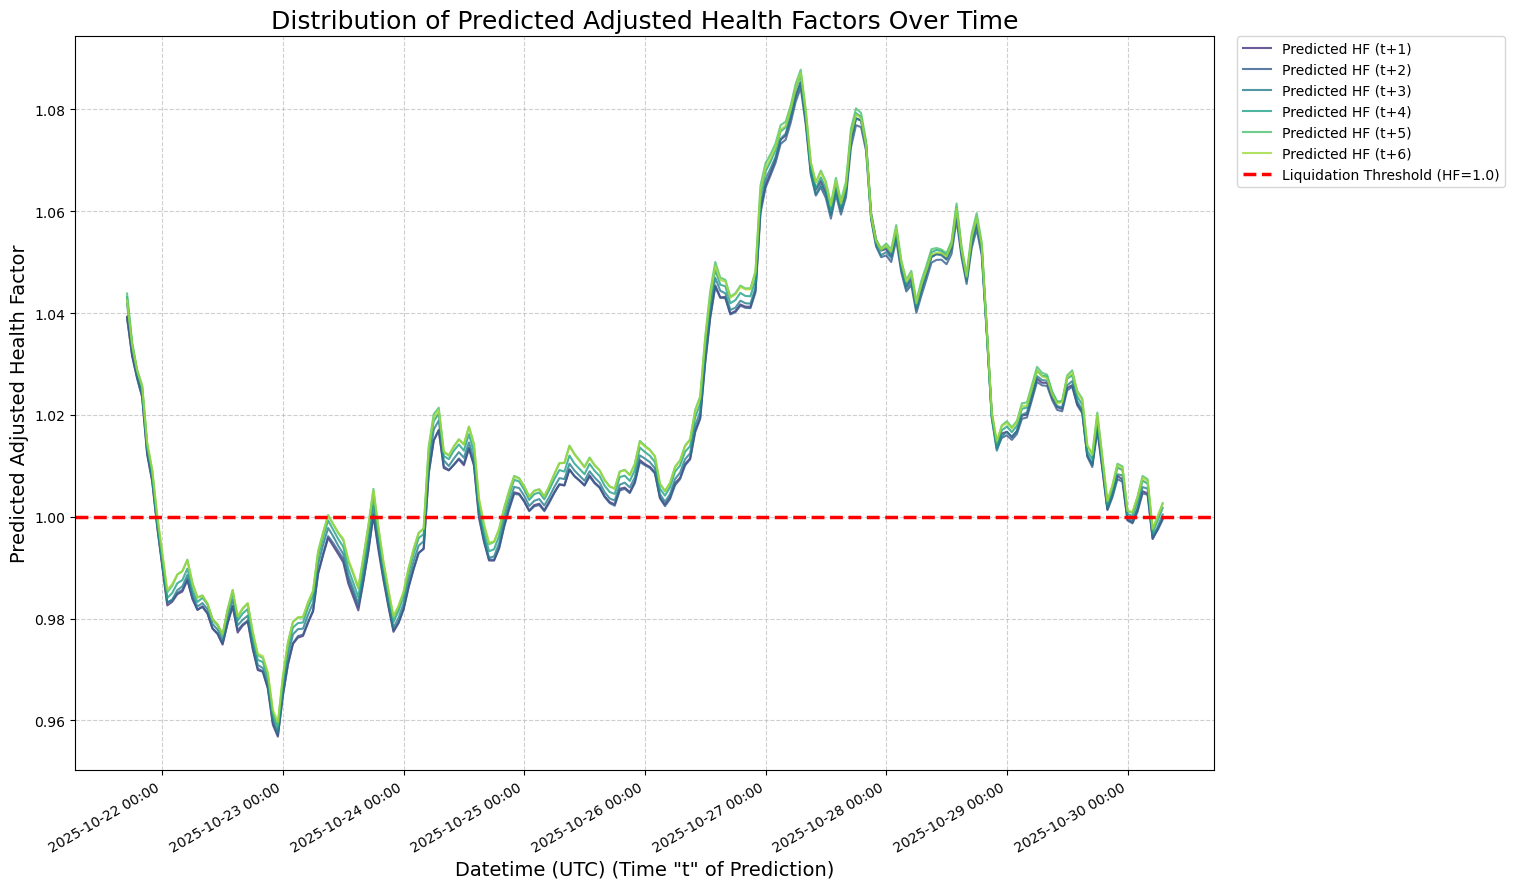

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import seaborn as sns # Using seaborn for better color palettes

# --- 1. Define Paths ---
BASE_PATH = r"F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\HF"
INPUT_DIR = os.path.join(BASE_PATH, "data", "predict_HF")
INPUT_FILENAME = os.path.join(INPUT_DIR, "predicted_hf_t1_to_t6.csv")
VISUALIZATION_DIR = os.path.join(BASE_PATH, "visualization")
OUTPUT_FILENAME = os.path.join(VISUALIZATION_DIR, "predicted_hf_distribution_over_time.png")

# Ensure output directory exists
os.makedirs(VISUALIZATION_DIR, exist_ok=True)

# Number of prediction steps
LOOKAHEAD_STEPS = 6

try:
    # --- 2. Load Data ---
    print(f"Loading data from {INPUT_FILENAME}...")
    df = pd.read_csv(INPUT_FILENAME)
    df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
    print(f"Data loaded. Found {len(df)} timestamps.")

    # --- 3. Create Plot ---
    print("Generating plot...")
    plt.figure(figsize=(18, 9))
    
    # Generate a color palette from seaborn
    colors = sns.color_palette("viridis", LOOKAHEAD_STEPS)

    # --- a. Plot each prediction horizon ---
    for i in range(1, LOOKAHEAD_STEPS + 1):
        column_name = f'HF_adjusted_t_plus_{i}'
        label_name = f'Predicted HF (t+{i})'
        
        plt.plot(df['datetime_utc'], df[column_name], 
                 label=label_name, 
                 color=colors[i-1], 
                 alpha=0.8, 
                 linewidth=1.5)

    # --- b. Add Liquidation Threshold line ---
    plt.axhline(y=1.0, color='red', linestyle='--', linewidth=2.5, 
                label='Liquidation Threshold (HF=1.0)')

    # --- 4. Format Plot (All in English) ---
    plt.title('Distribution of Predicted Adjusted Health Factors Over Time', fontsize=18)
    plt.xlabel('Datetime (UTC) (Time "t" of Prediction)', fontsize=14)
    plt.ylabel('Predicted Adjusted Health Factor', fontsize=14)
    
    # Create a legend
    # Place legend outside the plot
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Format x-axis dates
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

    # --- 5. Save Figure ---
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
    
    print(f"Saving plot to {OUTPUT_FILENAME}...")
    plt.savefig(OUTPUT_FILENAME, dpi=300, bbox_inches='tight')
    print("Visualization complete.")

except FileNotFoundError:
    print(f"\n[Error] Could not find file: {INPUT_FILENAME}")
    print("Please ensure the previous script (forward_6_HF_simulation.py) ran successfully.")
except KeyError as e:
    print(f"\n[Error] A required column is missing: {e}")
    print("Please check the input CSV file.")
except Exception as e:
    print(f"\nAn error occurred: {e}")

Loading prediction data from F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\HF\data\predict_HF\predicted_hf_t1_to_t6.csv...
Loading actual HF data from F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\HF\data\true_HF\true_hf_adjusted.csv...
Gathering all forecasts that converge on T = 2025-10-22 03:00:00+00:00
  Found: t-1 (Forecast 1h ahead) (at 2025-10-22 02:00:00+00:00) -> 0.983322
  Found: t-2 (Forecast 2h ahead) (at 2025-10-22 01:00:00+00:00) -> 0.983172
  Found: t-3 (Forecast 3h ahead) (at 2025-10-22 00:00:00+00:00) -> 0.990768
  Found: t-4 (Forecast 4h ahead) (at 2025-10-21 23:00:00+00:00) -> 0.999230
  Found: t-5 (Forecast 5h ahead) (at 2025-10-21 22:00:00+00:00) -> 1.009085
  Found: t-6 (Forecast 6h ahead) (at 2025-10-21 21:00:00+00:00) -> 1.014502
  Ground Truth (Actual HF at T): 0.989505
Generating plot...
Saving plot to F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\HF\visualization\hf_fore

C:\Users\10158\AppData\Local\Temp\ipykernel_25208\3711253748.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=predictions_for_T, palette=colors)


Visualization complete.


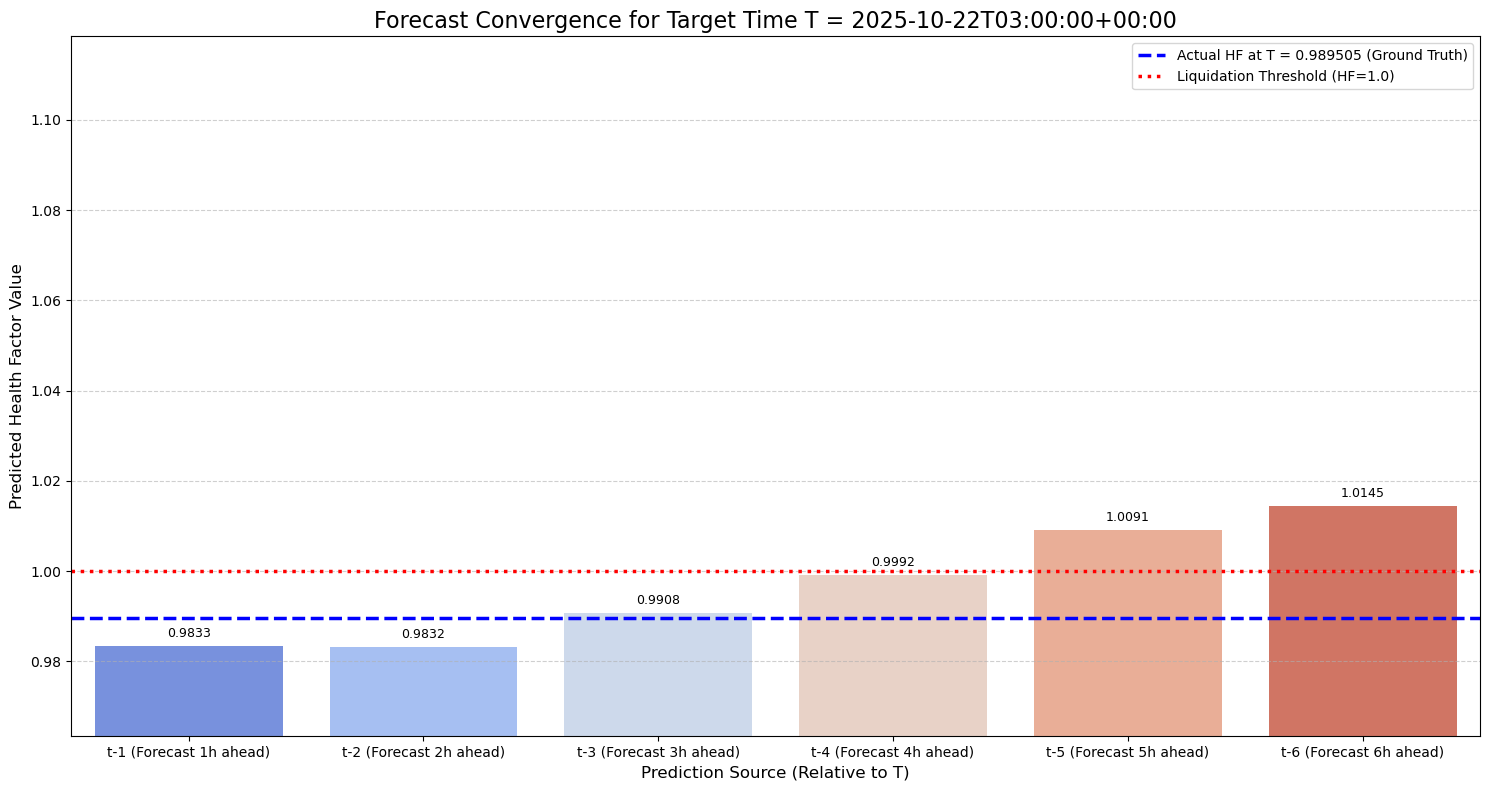

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

# --- 1. Define Paths and Target Timestamp ---
BASE_PATH = r"F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\HF"

# Input 1: The file with all predictions
PREDICTION_FILE = os.path.join(BASE_PATH, "data", "predict_HF", "predicted_hf_t1_to_t6.csv")

# Input 2: The file with the actual (ground truth) HF, for comparison
ACTUAL_HF_FILE = os.path.join(BASE_PATH, "data", "true_HF", "true_hf_adjusted.csv")

# Output
VISUALIZATION_DIR = os.path.join(BASE_PATH, "visualization")
OUTPUT_FILENAME = os.path.join(VISUALIZATION_DIR, "hf_forecast_convergence_at_T.png")

# -----------------------------------------------------------------
# (!!!) CHOOSE YOUR TARGET TIMESTAMP HERE (!!!)
# This is 'T', the time you want to inspect.
TARGET_TIMESTAMP_STR = "2025-10-22T03:00:00+00:00"
# -----------------------------------------------------------------

# Ensure output directory exists
os.makedirs(VISUALIZATION_DIR, exist_ok=True)

# Number of prediction steps
LOOKAHEAD_STEPS = 6

try:
    # --- 2. Load Data ---
    print(f"Loading prediction data from {PREDICTION_FILE}...")
    df_pred = pd.read_csv(PREDICTION_FILE)
    df_pred['datetime_utc'] = pd.to_datetime(df_pred['datetime_utc'])
    # Set index for easy lookup
    df_pred = df_pred.set_index('datetime_utc')

    print(f"Loading actual HF data from {ACTUAL_HF_FILE}...")
    df_actual = pd.read_csv(ACTUAL_HF_FILE)
    df_actual['datetime_utc'] = pd.to_datetime(df_actual['datetime_utc'])
    df_actual = df_actual.set_index('datetime_utc')
    
    # Convert target string to Timestamp object
    target_time_T = pd.to_datetime(TARGET_TIMESTAMP_STR)

    # --- 3. Find All Predictions for Target Time 'T' ---
    print(f"Gathering all forecasts that converge on T = {target_time_T}")
    
    predictions_for_T = []
    labels = []
    
    for i in range(1, LOOKAHEAD_STEPS + 1):
        # Calculate the "source" time 't' (e.g., T - 1 hour, T - 2 hours)
        source_time_t = target_time_T - pd.Timedelta(hours=i)
        
        # Define the column we need (e.g., HF_adjusted_t_plus_1)
        column_to_get = f'HF_adjusted_t_plus_{i}'
        
        # Label for the bar
        bar_label = f't-{i} (Forecast {i}h ahead)'
        
        try:
            # Find the row for 'source_time_t' and get the value from 'column_to_get'
            predicted_value = df_pred.loc[source_time_t, column_to_get]
            
            predictions_for_T.append(predicted_value)
            labels.append(bar_label)
            print(f"  Found: {bar_label} (at {source_time_t}) -> {predicted_value:.6f}")
            
        except KeyError:
            # This can happen if 'source_time_t' is not in the file (e.g., at the very beginning)
            print(f"  Warning: Could not find data for {bar_label} (at {source_time_t}).")
            predictions_for_T.append(np.nan)
            labels.append(bar_label)

    # --- 4. Get the "Ground Truth" values ---
    try:
        actual_hf_at_T = df_actual.loc[target_time_T, 'HF_adjusted']
        print(f"  Ground Truth (Actual HF at T): {actual_hf_at_T:.6f}")
    except KeyError:
        print(f"  Warning: Could not find Ground Truth HF for {target_time_T}.")
        actual_hf_at_T = np.nan

    # --- 5. Create Plot ---
    print("Generating plot...")
    plt.figure(figsize=(15, 8))
    
    # Create the bar plot
    colors = sns.color_palette("coolwarm", n_colors=LOOKAHEAD_STEPS)
    ax = sns.barplot(x=labels, y=predictions_for_T, palette=colors)
    
    # Add Ground Truth line
    if not np.isnan(actual_hf_at_T):
        ax.axhline(y=actual_hf_at_T, color='blue', linestyle='--', linewidth=2.5,
                   label=f'Actual HF at T = {actual_hf_at_T:.6f} (Ground Truth)')
    
    # Add Liquidation Threshold line
    ax.axhline(y=1.0, color='red', linestyle=':', linewidth=2.5,
               label='Liquidation Threshold (HF=1.0)')

    # --- 6. Format Plot (All in English) ---
    plt.title(f'Forecast Convergence for Target Time T = {TARGET_TIMESTAMP_STR}', fontsize=16)
    plt.xlabel('Prediction Source (Relative to T)', fontsize=12)
    plt.ylabel('Predicted Health Factor Value', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True, linestyle='--', alpha=0.6, axis='y')

    # Add text labels on top of each bar
    for p in ax.patches:
        if not np.isnan(p.get_height()):
            ax.annotate(format(p.get_height(), '.4f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points',
                       fontsize=9)
    
    # Adjust y-axis limits to make space for labels
    if not np.isnan(actual_hf_at_T):
        min_val = min(min(predictions_for_T), actual_hf_at_T, 1.0) * 0.98
        max_val = max(max(predictions_for_T), actual_hf_at_T, 1.0) * 1.05
        ax.set_ylim(min_val, max_val * 1.05) # Extra 5% for text
    
    # --- 7. Save Figure ---
    plt.tight_layout()
    print(f"Saving plot to {OUTPUT_FILENAME}...")
    plt.savefig(OUTPUT_FILENAME, dpi=300, bbox_inches='tight')
    print("Visualization complete.")

except FileNotFoundError as e:
    print(f"\n[Error] Could not find a required file. Please check paths.")
    print(f"File not found: {e.filename}")
except KeyError as e:
    print(f"\n[Error] A required column or index is missing: {e}")
    print("This might be a problem with the TARGET_TIMESTAMP_STR or the CSV files.")
except Exception as e:
    print(f"\nAn error occurred: {e}")

Loading prediction data from F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\HF\data\predict_HF\predicted_hf_t1_to_t6.csv...
Loading actual HF data from F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\HF\data\true_HF\true_hf_adjusted.csv...
Transforming data by shifting horizons to target time...
Data transformed. Plotting 201 time points.
Generating plot...
Saving plot to F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\HF\visualization\hf_all_forecasts_vs_ground_truth.png...
Visualization complete.


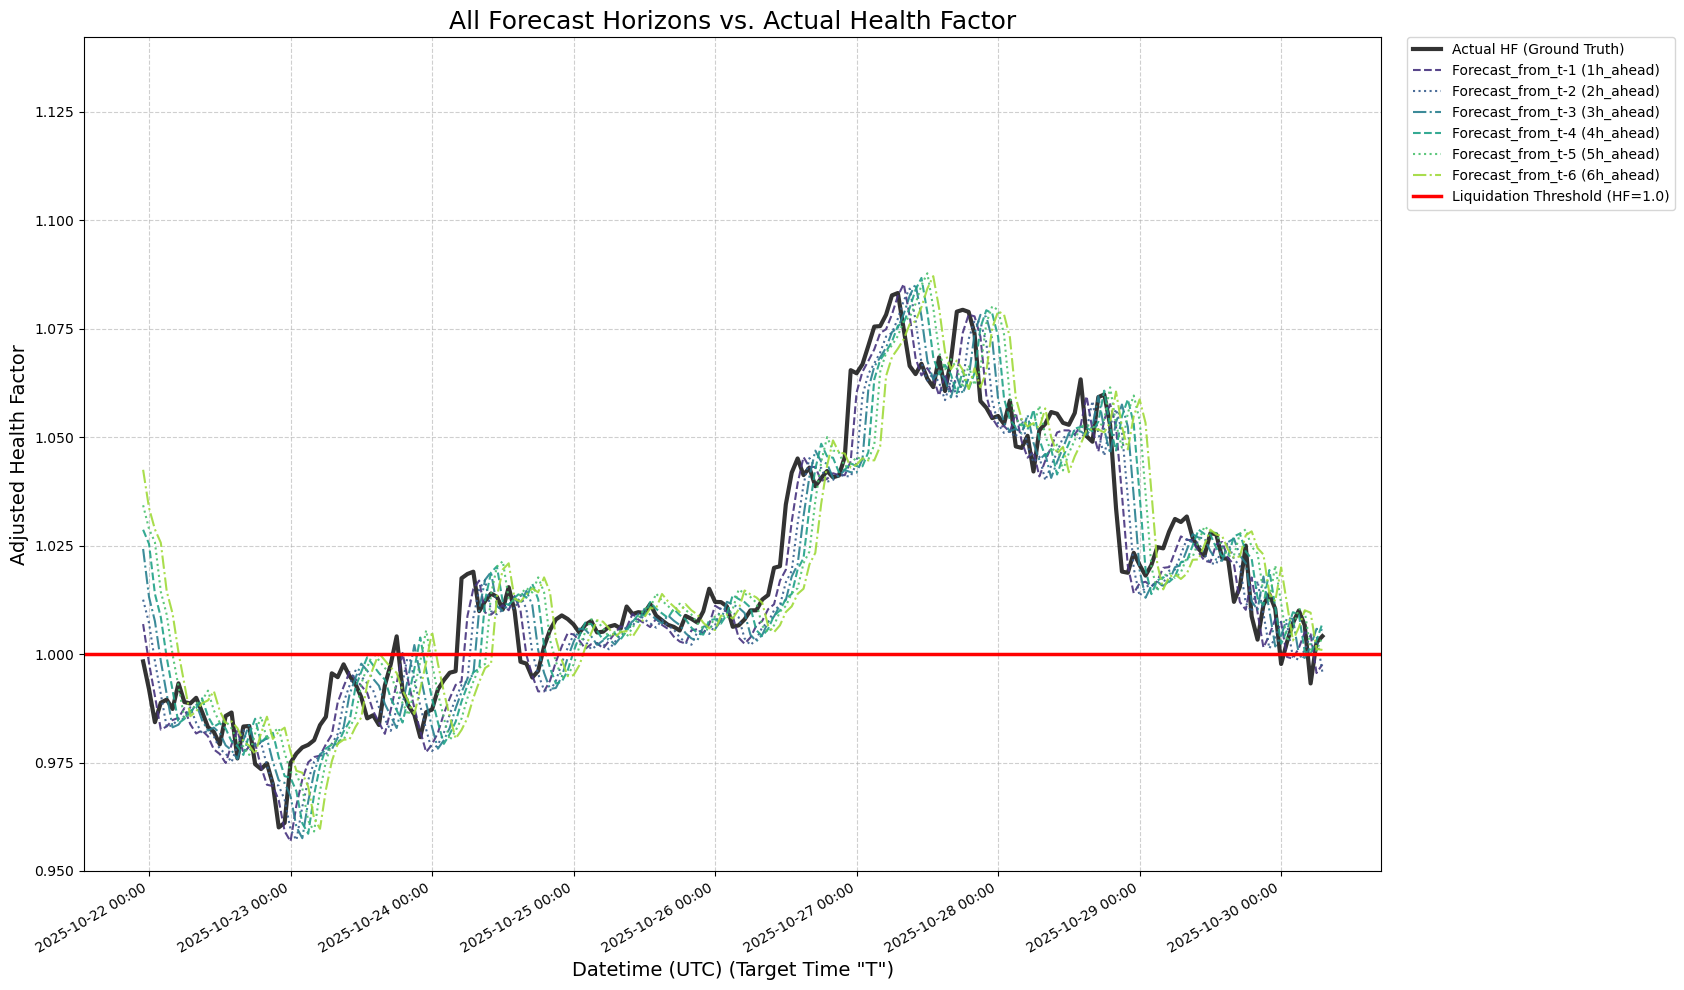

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import seaborn as sns # Using seaborn for better color palettes

# --- 1. Define Paths ---
BASE_PATH = r"F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\HF"

# Input 1: The file with all predictions
PREDICTION_FILE = os.path.join(BASE_PATH, "data", "predict_HF", "predicted_hf_t1_to_t6.csv")

# Input 2: The file with the actual (ground truth) HF
ACTUAL_HF_FILE = os.path.join(BASE_PATH, "data", "true_HF", "true_hf_adjusted.csv")

# Output
VISUALIZATION_DIR = os.path.join(BASE_PATH, "visualization")
OUTPUT_FILENAME = os.path.join(VISUALIZATION_DIR, "hf_all_forecasts_vs_ground_truth.png")

# Ensure output directory exists
os.makedirs(VISUALIZATION_DIR, exist_ok=True)

# Number of prediction steps
LOOKAHEAD_STEPS = 6

try:
    # --- 2. Load Data ---
    print(f"Loading prediction data from {PREDICTION_FILE}...")
    df_pred = pd.read_csv(PREDICTION_FILE)
    df_pred['datetime_utc'] = pd.to_datetime(df_pred['datetime_utc'])
    # Set index to 't' (the time the prediction was *made*)
    df_pred = df_pred.set_index('datetime_utc')

    print(f"Loading actual HF data from {ACTUAL_HF_FILE}...")
    df_actual = pd.read_csv(ACTUAL_HF_FILE)
    df_actual['datetime_utc'] = pd.to_datetime(df_actual['datetime_utc'])
    # Set index to 'T' (the time the HF *occurred*)
    df_actual = df_actual.set_index('datetime_utc')

    # --- 3. Create Transformed DataFrame for Plotting ---
    print("Transforming data by shifting horizons to target time...")
    
    # Start with the ground truth
    df_plot = pd.DataFrame(df_actual['HF_adjusted'].copy())
    df_plot = df_plot.rename(columns={'HF_adjusted': 'Ground_Truth_HF'})
    
    # Generate a color palette
    colors = sns.color_palette("viridis", LOOKAHEAD_STEPS)
    plot_styles = ['--', ':', '-.', '--', ':', '-.'] # Linestyles
    
    # Loop from 1 to 6
    for i in range(1, LOOKAHEAD_STEPS + 1):
        source_col = f'HF_adjusted_t_plus_{i}'
        target_col = f'Forecast_from_t-{i} ({i}h_ahead)'
        
        # (!!!) This is the key operation (!!!)
        # We take the column 'HF_adjusted_t_plus_i' (made at time 't')
        # and shift its index *forward* by 'i' hours
        # so it lines up with its target time 'T' (which is t+i).
        
        shifted_series = df_pred[source_col].shift(i)
        
        df_plot[target_col] = shifted_series

    # Drop any rows with NaNs (e.g., at the beginning/end from shifting)
    df_plot = df_plot.dropna()
    print(f"Data transformed. Plotting {len(df_plot)} time points.")

    # --- 4. Create Plot ---
    print("Generating plot...")
    plt.figure(figsize=(20, 10))
    ax = plt.gca()
    
    # Plot Ground Truth (Thick, Black)
    ax.plot(df_plot.index, df_plot['Ground_Truth_HF'], 
            label='Actual HF (Ground Truth)', 
            color='black', 
            linewidth=3, 
            alpha=0.8)
            
    # Plot all the forecasts
    for i in range(1, LOOKAHEAD_STEPS + 1):
        col_name = f'Forecast_from_t-{i} ({i}h_ahead)'
        ax.plot(df_plot.index, df_plot[col_name],
                label=col_name,
                color=colors[i-1],
                linestyle=plot_styles[i-1],
                linewidth=1.5,
                alpha=0.9)

    # --- 5. Format Plot (All in English) ---
    
    # Add Liquidation Threshold line
    ax.axhline(y=1.0, color='red', linestyle='-', linewidth=2.5, 
               label='Liquidation Threshold (HF=1.0)')
    
    plt.title('All Forecast Horizons vs. Actual Health Factor', fontsize=18)
    plt.xlabel('Datetime (UTC) (Target Time "T")', fontsize=14)
    plt.ylabel('Adjusted Health Factor', fontsize=14)
    
    # Place legend outside the plot
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Format x-axis dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
    
    # Set a reasonable y-limit if HF is high, but ensure 1.0 is visible
    min_hf = df_plot.min().min()
    max_hf = df_plot.max().max()
    ax.set_ylim(min(min_hf, 0.95), max(max_hf, 1.05) * 1.05) # Ensure 1.0 is visible

    # --- 6. Save Figure ---
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
    
    print(f"Saving plot to {OUTPUT_FILENAME}...")
    plt.savefig(OUTPUT_FILENAME, dpi=300, bbox_inches='tight')
    print("Visualization complete.")

except FileNotFoundError as e:
    print(f"\n[Error] Could not find a required file. Please check paths.")
    print(f"File not found: {e.filename}")
except KeyError as e:
    print(f"\n[Error] A required column or index is missing: {e}")
    print("This might be a problem with the CSV files.")
except Exception as e:
    print(f"\nAn error occurred: {e}")